### A power transform will make the probability distribution of a variable more Gaussian.

### This is often described as removing a skew in the distribution, although more generally is described as  stabilizing the variance of the distribution.

### The log transform is a specific example of a family 

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,QuantileTransformer
from sklearn.pipeline import Pipeline

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
X,y = fetch_california_housing(as_frame=True,return_X_y=True)

In [9]:
X = X.iloc[:,:-2]

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [11]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

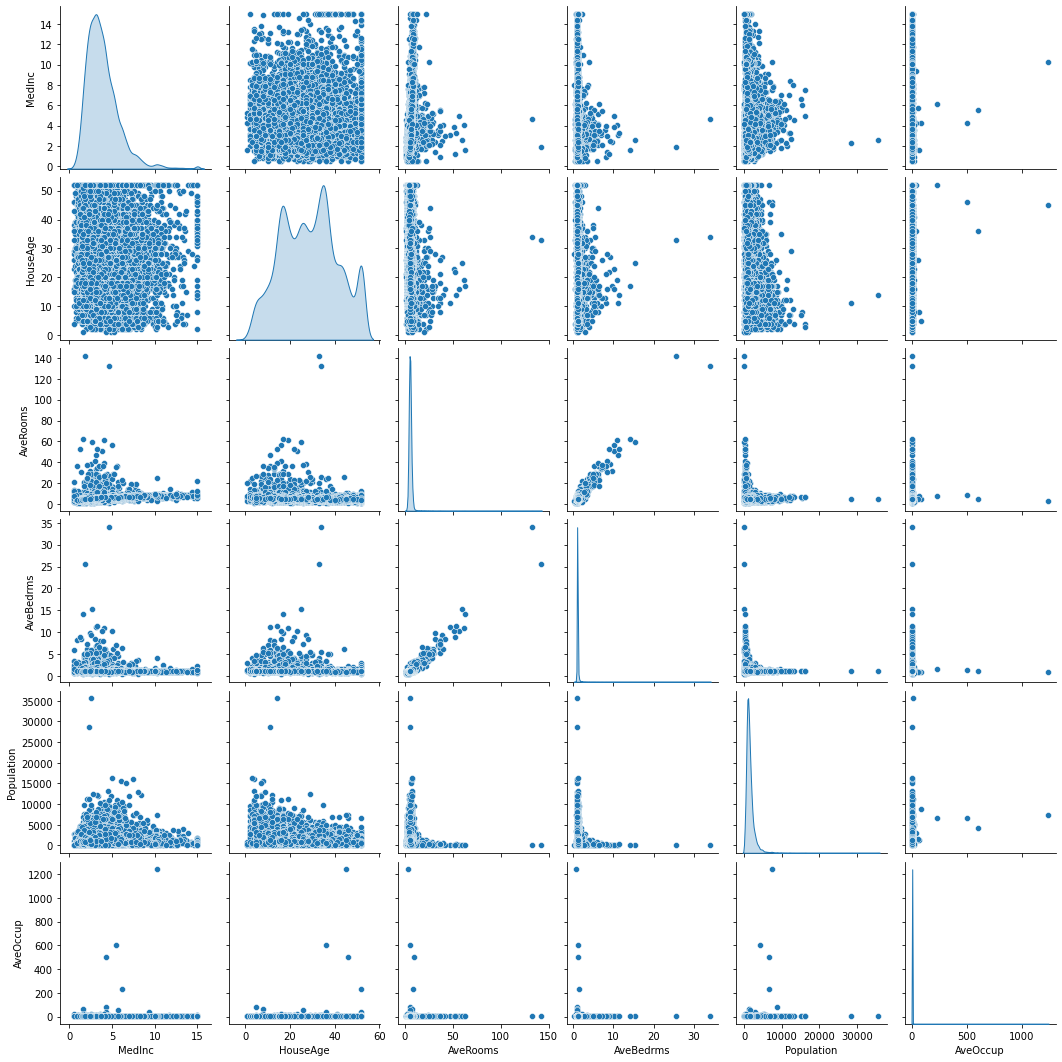

In [12]:
sns.pairplot(X,diag_kind='kde')

In [14]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [22]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after' +str(t).split('(')[0])

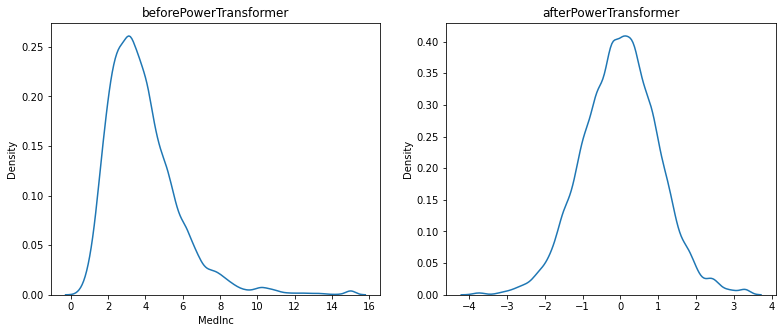

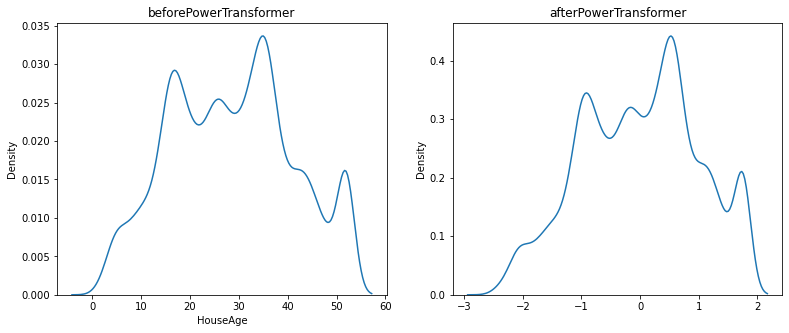

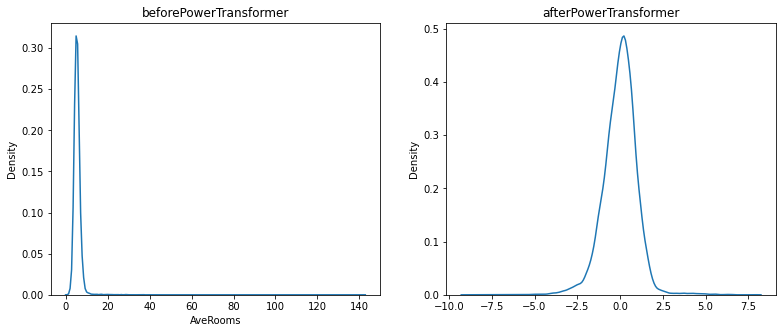

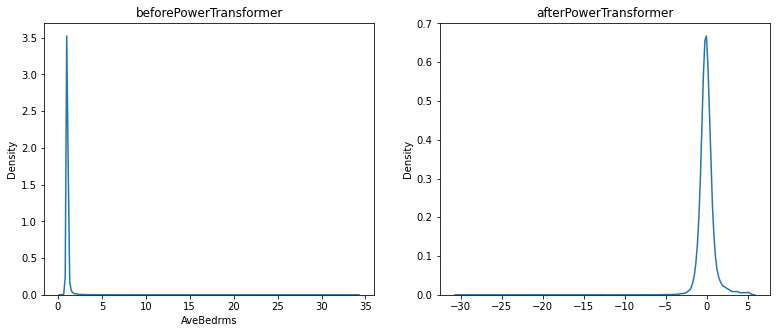

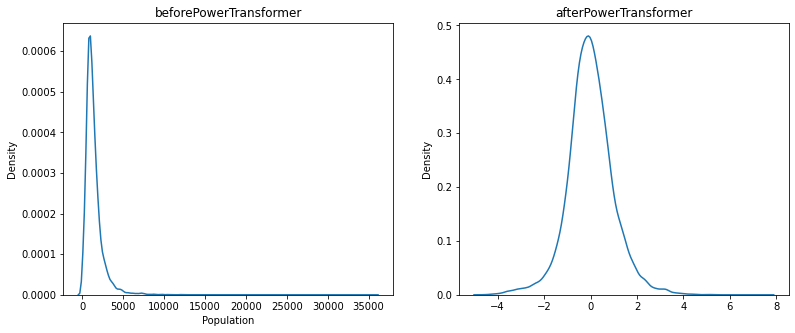

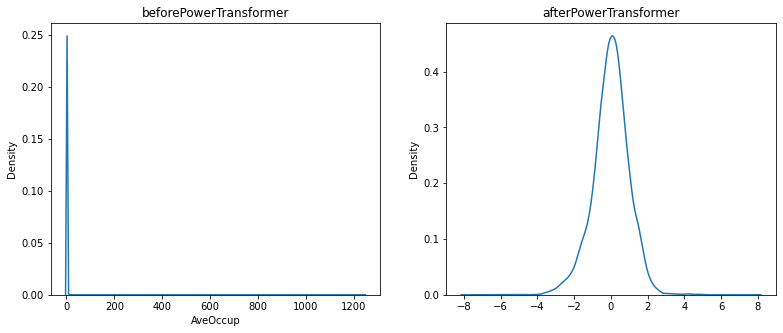

In [26]:
for i in X.columns:
    plots(X,i,PowerTransformer(method='box-cox'))

In [24]:
### Skewness is removed

In [27]:
p = PowerTransformer(method='box-cox')
p.fit_transform(X_train)

array([[ 0.40281908, -1.92782549,  1.42598869,  0.82522832, -1.96446909,
         0.84580969],
       [ 0.47870349,  1.75743614,  0.12767532,  0.34757828,  0.32304211,
         0.65346554],
       [ 0.24184739, -0.16025422, -0.36702734, -0.09053295, -0.21606302,
        -0.01882737],
       ...,
       [-0.19787028,  0.22945234, -1.35085249, -1.12159002, -0.70907513,
        -1.94051908],
       [ 1.02558383,  0.45750336, -0.47358212,  0.05988359, -0.17597578,
        -0.89334188],
       [-1.88200113, -1.07487729, -1.04180675,  0.34757828, -0.21336265,
         0.77358437]])

In [28]:
p.lambdas_

array([ 0.09829722,  0.81124522, -0.28269234, -1.58333516,  0.23291759,
       -0.49773797])

In [48]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', PowerTransformer(method = 'box-cox')),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [49]:
model_accuracy_scaled(KNeighborsRegressor())

0.6459708428393122

In [50]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [51]:
model_accuracy_scaled(LinearRegression())

0.5532048996788266

In [52]:
model_accuracy_unscaled(LinearRegression())

0.5250770679886738

In [53]:
model_accuracy_scaled(RandomForestRegressor())

0.671083859127616

In [54]:
model_accuracy_unscaled(RandomForestRegressor())

0.6692288145120417

## Quantile Transformer Scaler

### Quantile transforms are a technique for transforming numerical input or output variables to have a Gaussian or uniform probability distribution.
### It reduces the impact of outliers

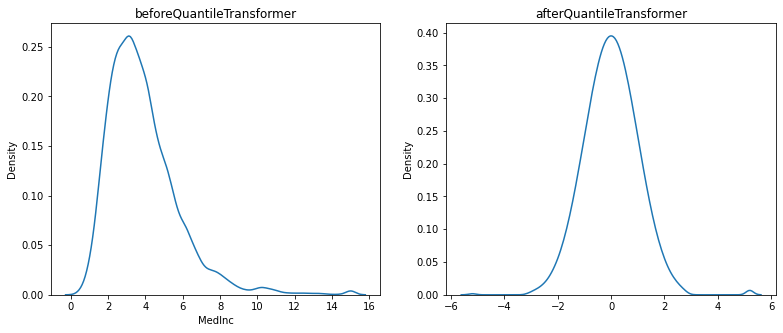

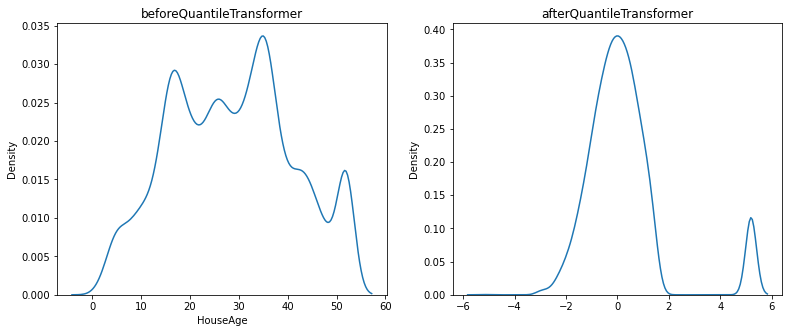

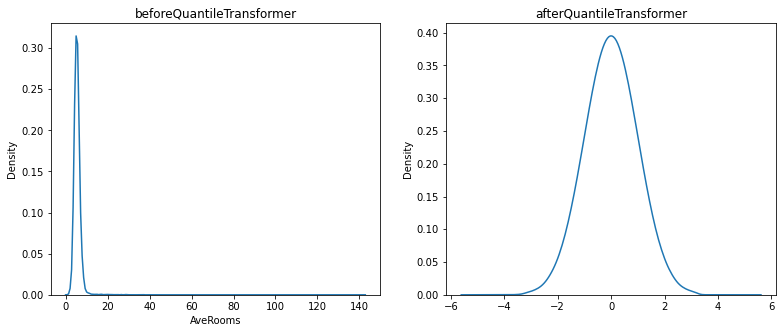

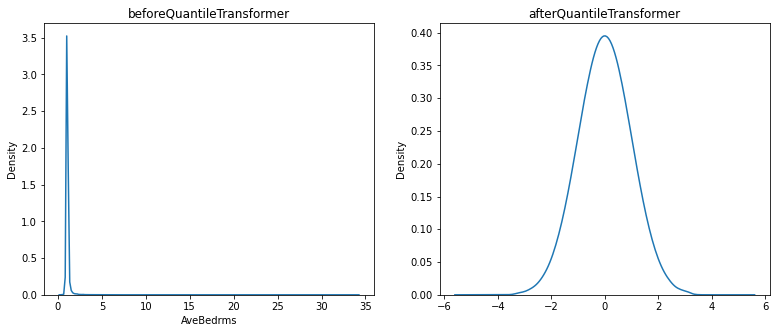

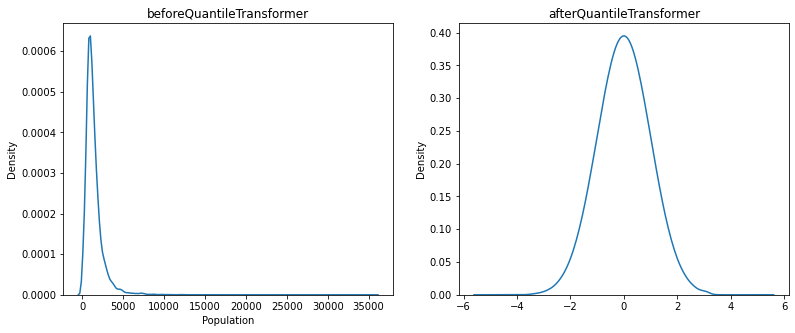

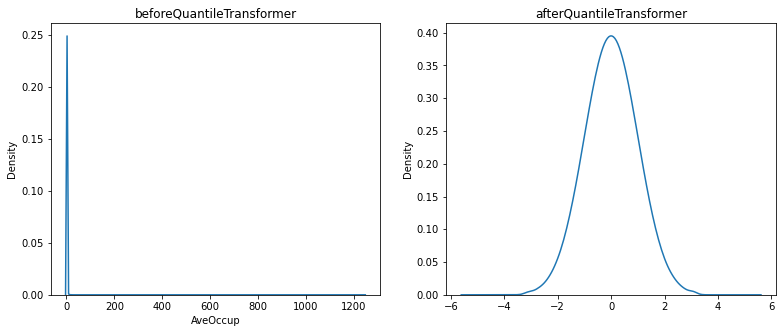

In [57]:
for i in X.columns:
    plots(X,i,QuantileTransformer(output_distribution='normal'))

In [58]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', QuantileTransformer(output_distribution= 'normal')),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [59]:
model_accuracy_scaled(KNeighborsRegressor())

0.6365835864019451

In [60]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [61]:
model_accuracy_scaled(LinearRegression())

0.5405503113891277

In [62]:
model_accuracy_unscaled(LinearRegression())

0.5250770679886738

In [63]:
model_accuracy_scaled(RandomForestRegressor())

0.6704098814111419

In [64]:
model_accuracy_unscaled(RandomForestRegressor())

0.6700087297808911

### Normalizer